In [9]:
#import dependencies
import os
import requests
import json
import time
from config import ow_api
import numpy
import random
import matplotlib.pyplot as plt
import pandas as pd
#add citipy for dealing with city names
from citipy import citipy
#added scipy linregress to create regression equation further down
from scipy.stats import linregress

API = ow_api


In [2]:
#load in cities json and create empty lists
with open('city_list.json', 'r', encoding='utf-8') as jsonfile:
    jsondata = json.load(jsonfile)

ids = []
name = []
country = []
lat = []
lon = []
#append data to above lists
for r in range(len(jsondata)):
    ids.append(jsondata[r]['id'])
    name.append(jsondata[r]['name'].lower())
    country.append(jsondata[r]['country'])
    lat.append(jsondata[r]['coord']['lat'])
    lon.append(jsondata[r]['coord']['lon'])
#create temp dataframe and export cities to csv    
df_temp = pd.DataFrame({'id':ids, 'City':name, 'Country':country, 'Lat':lat, 'Lng':lon})
df_temp.to_csv("output/cities.csv", index=False, header=True)

In [7]:
## Get a random list of 500 cities
cities_df = pd.read_csv("output/cities.csv", encoding="utf-8")
# set the dataframe index to city
cities_df = cities_df.set_index("City")

cities_df.head(10)

,id,Country,Lat,Lng
City,,,,
ḩeşār-e sefīd,833.0,IR,34.330502,47.159401
‘ayn ḩalāqīm,2960.0,SY,34.940079,36.321911
taglag,3245.0,IR,38.450001,44.983330
qabāghlū,3530.0,IR,36.173302,46.168499
‘arīqah,5174.0,SY,32.889809,36.483360
kalāteh-ye dowlat,7264.0,IR,36.163841,57.616982
behjatābād,8084.0,IR,36.667431,51.461639
ţālesh maḩalleh,9874.0,IR,36.894329,50.679192
shahrīār kandeh,11263.0,IR,36.631939,53.199020


In [ ]:
# set number of cities to add to random city list
num_cities = 500

In [9]:
# Select 500 unique cities and save the data into random_cities.csv

name_city = []
id_city = []
country_city = []
lat_city = []
lon_city = []

#set i for counter
i = 0
# while loop iterates 500 times
while(i < num_cities):
    i = i + 1
    latitude = random.uniform(-90.0,90.0)
    longitude = random.uniform(-180.0,180.0)
    city = citipy.nearest_city(latitude, longitude)
    try:
        id = int(cities_df.loc[city.city_name]['id'])
        try:
            itemp = id_city.index(id)
            i = i - 1
        except:
            id_city.append(id)
            name_city.append(city.city_name)
            country_city.append(cities_df.loc[city.city_name]['Country'])
            lat_city.append(cities_df.loc[city.city_name]['Lat'])
            lon_city.append(cities_df.loc[city.city_name]['Lng'])
    except:
        i = i - 1

df_temp = pd.DataFrame({'City':name_city,'id':id_city,'Country':country_city,'Lat':lat_city,'Lng':lon_city})
df_temp.to_csv("output/random_cities.csv", index=False, header=True)

IndentationError: unexpected indent (<ipython-input-9-73c8f3072718>, line 12)

In [4]:
#create the dataframe of random cities
cities = pd.read_csv("output/random_cities.csv", encoding="utf-8")
cities.head()

,City,id,Country,Lat,Lng
0,rikitea,4030556,PF,-23.120279,-134.969177
1,hithadhoo,1282256,MV,-0.600000,73.083328
2,bambous virieux,1106677,MU,-20.342779,57.757500
3,lompoc,5367788,US,34.639149,-120.457939
4,punta arenas,3874787,CL,-53.150002,-70.916672


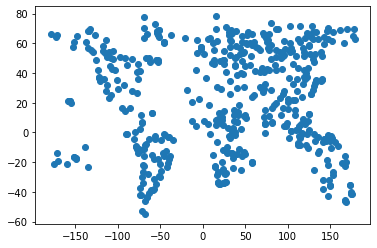

In [5]:
#plot the random cities to be sure we got a good spatial distribution
plt.scatter(cities["Lng"],cities["Lat"])
## The plot resembles the continents which seems to indicate a good random sample. 
##Seems odd to get so many locations on pacific islands and hawaii.

In [16]:
# Request weather informatiton for the selected cities and save into a json file weatherlist.json

jsnlist = []

i = 0
waitingtime = 0

while i < 500:
    id_num = cities['id'][i]
    url = f"http://api.openweathermap.org/data/2.5/forecast?id={id_num}&units=imperial&APPID={API}"
    jsn = requests.get(url).json()
    try:
        print('City-{0}: {1}'.format(i,jsn['city']['name']))
        jsnlist.append(jsn)
        i = i + 1
        waitingtime = 0
    except:
        waitingtime = waitingtime + 1
        print(f"Waiting {waitingtime} seconds")
        time.sleep(1)
    
with open('output/weather_list.json', 'w') as jsonfile:
    json.dump(jsnlist, jsonfile)

City-0: Rikitea
City-1: Hithadhoo
City-2: Bambous Virieux
City-3: Lompoc
City-4: Punta Arenas
City-5: Hermanus
City-6: Khatanga
City-7: Bengkulu
City-8: Qingdao
City-9: Maumere
City-10: Bandarbeyla
City-11: Varenikovskaya
City-12: Tezu
City-13: Ushuaia
City-14: Tasiilaq
City-15: Kota Kinabalu
City-16: Faanui
City-17: Karatau
City-18: Codo
City-19: Katsuura
City-20: Casper
City-21: Pampa
City-22: Tiksi
City-23: Nambour
City-24: Dikson
City-25: Avarua
City-26: Merrill
City-27: Cherskiy
City-28: Marabu
City-29: Tokur
City-30: Pangnirtung
City-31: Marawi
City-32: Port Blair
City-33: Bluff
City-34: Hasaki
City-35: Naze
City-36: Cody
City-37: Kovernino
City-38: Yellowknife
City-39: Mwinilunga
City-40: Ulladulla
City-41: Maniitsoq
City-42: Chaozhou
City-43: Hilo
City-44: Rawson
City-45: Erenhot
City-46: Pyaozerskiy
City-47: Saskylakh
City-48: Anadyr
City-49: Medvedka
City-50: Vaini
City-51: Mahina
City-52: Peterhead
City-53: Mpongwe
City-54: Isangel
City-55: Kuah
City-56: Saint Paul Harbor
Ci

City-428: Surt
City-429: Makushino
City-430: Loa Janan
City-431: Pontes e Lacerda
City-432: Ambilobe
City-433: Kuvandyk
City-434: Naifaru
City-435: Watsa
City-436: Koumra
City-437: Mingguang
City-438: Khandyga
City-439: Puerto Quijarro
City-440: Ulaangom
City-441: Honiara
City-442: Sozimskiy
City-443: Balagansk
City-444: Lilongwe
City-445: Bria
City-446: Bassano
City-447: Fort-Shevchenko
City-448: Kemin
City-449: West Milford
City-450: Ndola
City-451: Muisne
City-452: Shar
City-453: Rafai
City-454: Luganville
City-455: Kavieng
City-456: Toora-Khem
City-457: Tarnalelesz
City-458: Kargasok
City-459: Cap-aux-Meules
City-460: Tupik
City-461: Sioux Lookout
City-462: Uwajima
City-463: Iskateley
City-464: Saraza
City-465: Edd
City-466: Makakilo City
City-467: Malkara
City-468: Ostrogozhsk
City-469: Kuching
City-470: Kassala
City-471: Khilok
City-472: Port Jervis
City-473: Marovoay
City-474: Sonoita
City-475: Markova
City-476: Barabinsk
City-477: Lodwar
City-478: Amurzet
City-479: Bang Mun Nak

In [6]:
# Import json weather data
with open('output/weather_list.json', 'r', encoding='utf-8') as jsonfile:
    weather_list = json.load(jsonfile)
# add data to cities from weather and give it nice looking names    
cities['Date'] = [weather_list[i]['list'][0]['dt'] for i in range(len(weather_list))]
cities['Cloudiness'] = [weather_list[i]['list'][0]['clouds']['all'] for i in range(len(weather_list))]
cities['Humidity'] = [weather_list[i]['list'][0]['main']['humidity'] for i in range(len(weather_list))]
cities['Max Temp'] = [weather_list[i]['list'][0]['main']['temp_max'] for i in range(len(weather_list))]
cities['Wind Speed'] = [weather_list[i]['list'][0]['wind']['speed'] for i in range(len(weather_list))]

# export combined city and weather data to csv
cities.to_csv("output/cities_weather.csv", index=False, header=True)

In [3]:
# read csv created above into a dataframe for graphing and analysis
city_weather_df = pd.read_csv("output/cities_weather.csv", encoding = "utf-8")
city_weather_df.head()

,City,id,Country,Lat,Lng,Date,Cloudiness,Humidity,Max Temp,Wind Speed
0,rikitea,4030556,PF,-23.120279,-134.969177,1607817600,100,80,75.54,12.44
1,hithadhoo,1282256,MV,-0.600000,73.083328,1607817600,41,77,82.22,17.11
2,bambous virieux,1106677,MU,-20.342779,57.757500,1607817600,55,78,75.38,16.62
3,lompoc,5367788,US,34.639149,-120.457939,1607817600,75,89,58.69,16.51
4,punta arenas,3874787,CL,-53.150002,-70.916672,1607817600,65,63,48.74,15.57


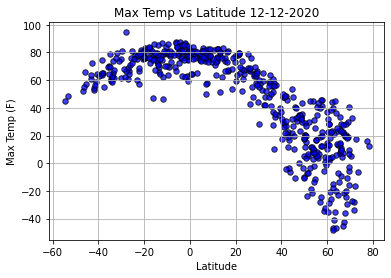

In [12]:
#create scatter plot for lat vs max temp
plt.scatter(city_weather_df['Lat'],
            city_weather_df['Max Temp'],
            marker="o", facecolors="blue",
            edgecolors="black",s=30,
            alpha=0.75
           )
plt.title("Max Temp vs Latitude 12-12-2020")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid()
#save figure
#plt.savefig("output/Lat-vs-Temp.png")
#show plot
plt.show()
## I would expect to see the opposite pattern along the x axis here during northing summer/southern winter. On this graph we 
## have cold temps at high lats due to northern winter.

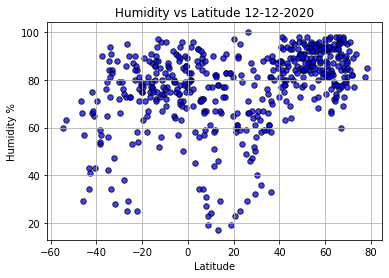

In [10]:
#create scatter plot for lat vs humidity
plt.scatter(city_weather_df['Lat'], city_weather_df['Humidity'], marker="o", facecolors="blue", edgecolors="black",s=30, alpha=0.75)
plt.title("Humidity vs Latitude 12-12-2020")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid()
#save figure
plt.savefig("output/Lat-vs-Humidity.png")
#show plot
plt.show()

## this distribution makes sense given it is winter in the northern hemisphere. The two low humidity areas around 0 to 20 and
## -20 to -40 latitude line up with the lats of the sahara desert and australia/south africa/argentina respectively. 

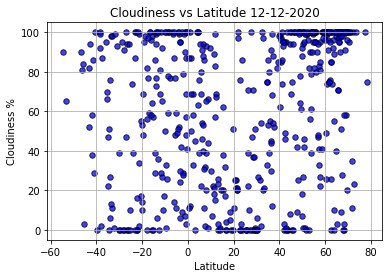

In [11]:
#create scatter plot for lat vs cloudiness
plt.scatter(city_weather_df['Lat'], city_weather_df['Cloudiness'], marker="o", facecolors="blue", edgecolors="black",s=30, alpha=0.75)
plt.title("Cloudiness vs Latitude 12-12-2020")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid()
#save figure
plt.savefig("output/Lat-vs-Cloudiness.png")
#show plot
plt.show()
## looks like there are a lot of points clustered along the top and bottom; again they seem to line up to the season and global
## wet/dry lat belts.

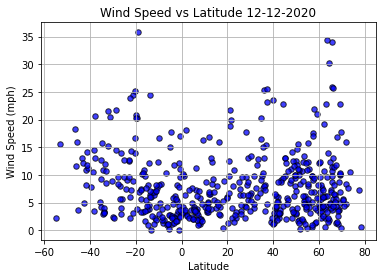

In [13]:
#create scatter plot for lat vs wind speed
plt.scatter(city_weather_df['Lat'], city_weather_df['Wind Speed'], marker="o", facecolors="blue", edgecolors="black",s=30, alpha=0.75)
plt.title("Wind Speed vs Latitude 12-12-2020")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
#save figure
plt.savefig("output/Lat-vs-Wind Speed.png")
#show plot
plt.show()

## Looking at the wind speed doesn't seem to conclusive from this list of cities; I know there are bands of high and low winds
## but with a small sample of global locations like this they don't seem to show up too well.

In [16]:
# Create Northern and Southern hemisphere cities
nh_cities = city_weather_df.loc[city_weather_df["Lat"] >= 0.0]
#nh_cities.reset_index(inplace=True)

sh_cities = city_weather_df.loc[city_weather_df["Lat"] < 0.0]
#nh_cities.reset_index(inplace=True)

In [18]:
## Create Linear Regression function to use in following graphs instead of retyping the whole equation 
## for every linear regression. Doing this for the plots above would probably be a good idea too if I ever clean up the code.

def plot_LinearRegression(xdata, ydata, xlbl, ylbl, lblpos, ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata, ydata)
    plt.plot(xdata, regress_values,"r-")
    plt.annotate(line_eq, lblpos, fontsize=15, color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.savefig(f"output/fig{ifig}.png")
    plt.show()

The r-squared is: -0.8402984791764633


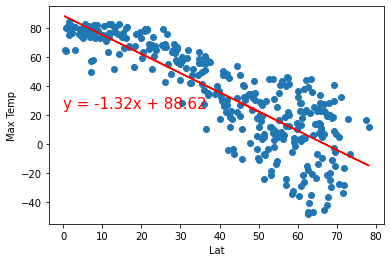

In [19]:
##create linear regression for lat vs max temp in northern hemisphere
xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (0,25)
plot_LinearRegression(nh_cities[xlbl], nh_cities[ylbl], xlbl, ylbl, lblpos,5)
## This plot shows the strongest trend

The r-squared is: 0.5826675052992442


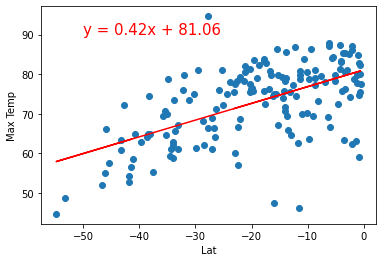

In [30]:
# linear regression for lat vs max temp for southern hemisphere
xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (-50,90)
plot_LinearRegression(sh_cities[xlbl], sh_cities[ylbl], xlbl, ylbl, lblpos,5)

The r-squared is: 0.4752488582890559


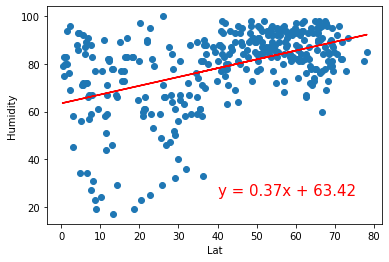

In [31]:
#create linear regression for lat vs humidity in northern hemisphere
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (40,25)
plot_LinearRegression(nh_cities[xlbl], nh_cities[ylbl], xlbl, ylbl, lblpos,5)

The r-squared is: 0.4077385627278897


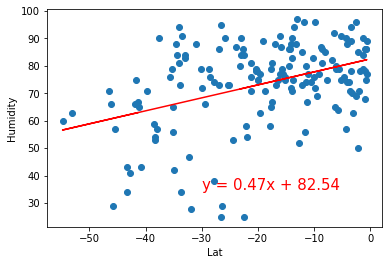

In [34]:
#create linear regression for lat vs humidity in southern hemisphere
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (-30,35)
plot_LinearRegression(sh_cities[xlbl], sh_cities[ylbl], xlbl, ylbl, lblpos,5)

The r-squared is: 0.3821308174623371


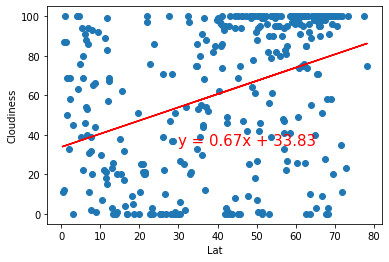

In [36]:
#create linear regression for lat vs cloudiness in northern hemisphere
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (30,35)
plot_LinearRegression(nh_cities[xlbl], nh_cities[ylbl], xlbl, ylbl, lblpos,5)

The r-squared is: 0.0526380039233461


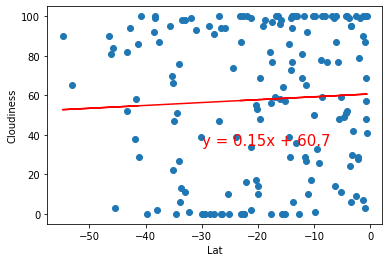

In [37]:
#create linear regression for lat vs cloudiness in southern hemisphere
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (-30,35)
plot_LinearRegression(sh_cities[xlbl], sh_cities[ylbl], xlbl, ylbl, lblpos,5)

The r-squared is: 0.15136700678594114


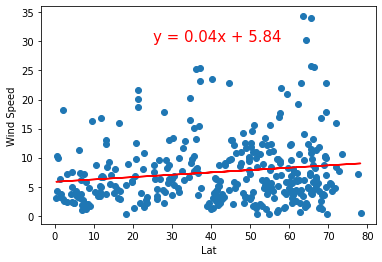

In [41]:
#create linear regression for lat vs wind speed in northern hemisphere
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (25,30)
plot_LinearRegression(nh_cities[xlbl], nh_cities[ylbl], xlbl, ylbl, lblpos,5)

The r-squared is: -0.3185569296626939


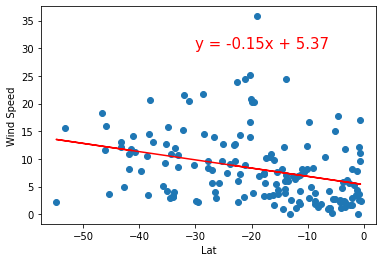

In [43]:
#create linear regression for lat vs wind speed in southern hemisphere
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (-30,30)
plot_LinearRegression(sh_cities[xlbl], sh_cities[ylbl], xlbl, ylbl, lblpos,5)